In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

In [117]:
random_state = 20
threshold = 2

In [118]:
df = pd.read_csv("test_data/Grounded CPW Leaky Wave antenna/S11 Data.csv")

In [119]:
df

,Feed_Gap [mm],Feed_Inset [cm],Feed_W [cm],Ground_gap [mm],Pad_L [cm],Pad_W [cm],Freq [GHz],"dB(S(1,1)) []"
0,0.5,0.2,1.2,3,0.70,0.9,2.00,-0.232632
1,0.5,0.2,1.2,3,0.70,0.9,2.09,-0.340011
2,0.5,0.2,1.2,3,0.70,0.9,2.18,-1.501822
3,0.5,0.2,1.2,3,0.70,0.9,2.27,-1.827965
4,0.5,0.2,1.2,3,0.70,0.9,2.36,-0.448171
...,...,...,...,...,...,...,...,...
4216,0.5,0.2,1.2,4,0.75,1.2,19.64,-15.530748
4217,0.5,0.2,1.2,4,0.75,1.2,19.73,-15.681817
4218,0.5,0.2,1.2,4,0.75,1.2,19.82,-15.837634
4219,0.5,0.2,1.2,4,0.75,1.2,19.91,-16.001216


In [120]:
input_x = df.drop(columns=['dB(S(1,1)) []'], axis=1)
input_y = df[['dB(S(1,1)) []']]

In [121]:
scaler = MinMaxScaler(feature_range=(0,1))

In [122]:
X_train, X_test, y_train, y_test = train_test_split(input_x, input_y, random_state=random_state)

In [123]:
model = DecisionTreeRegressor(random_state=random_state)

In [124]:
pipeline = Pipeline(steps=[('normalize', scaler), ('model', model)])
# pipeline = model

In [125]:
pipeline_fit = pipeline.fit(X_train, y_train)
predictions = pipeline_fit.predict(X_test)


In [126]:
results = X_test.copy()

In [127]:
# Check if predicted value is threshold amount above or below actual value
def is_in_threshold(actual, pred):
    return pred <= actual + threshold and pred >= actual - threshold

In [128]:
def create_tf_column(results):
    return results.apply(lambda x: is_in_threshold(x['y_test'], x['predictions']), axis=1)

In [129]:
def get_score(X_test, y_test, predictions, clf_dt):
    predictions = clf_dt.predict(X_test)
    dataframe = pd.DataFrame(X_test.copy(), columns=input_x.columns)
    dataframe['y_test'] = y_test.values
    dataframe['predictions'] = predictions
    return create_tf_column(dataframe).value_counts().get(True) / dataframe.shape[0]

In [130]:
X_test

,Feed_Gap [mm],Feed_Inset [cm],Feed_W [cm],Ground_gap [mm],Pad_L [cm],Pad_W [cm],Freq [GHz]
3512,0.5,0.2,1.2,3,0.70,1.2,10.55
739,0.5,0.2,1.0,3,0.70,1.0,14.24
1709,0.5,0.2,1.2,4,0.70,1.0,11.09
3886,0.5,0.2,1.2,3,0.75,1.2,8.03
3856,0.5,0.2,1.2,3,0.75,1.2,5.33
...,...,...,...,...,...,...,...
1498,0.5,0.2,1.2,3,0.70,1.0,10.19
3456,0.5,0.2,1.2,3,0.70,1.2,5.51
1361,0.4,0.2,1.2,3,0.70,1.0,15.95
1344,0.4,0.2,1.2,3,0.70,1.0,14.42


In [131]:
get_score(X_test, y_test, predictions, pipeline)

0.7585227272727273

In [132]:

path = model.cost_complexity_pruning_path(X_train, y_train)

In [133]:
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
ccp_alphas = ccp_alphas[0::50]

In [134]:
clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeRegressor(random_state=random_state, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [135]:
# train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [get_score(X_test, y_test, predictions, clf_dt) for clf_dt in clf_dts]

In [136]:
test_scores

[0.7623106060606061,
 0.7623106060606061,
 0.7623106060606061,
 0.7623106060606061,
 0.7623106060606061,
 0.7623106060606061,
 0.7623106060606061,
 0.7623106060606061,
 0.7623106060606061,
 0.7632575757575758,
 0.7632575757575758,
 0.7632575757575758,
 0.7632575757575758,
 0.7632575757575758,
 0.7642045454545454,
 0.7651515151515151,
 0.7651515151515151,
 0.7651515151515151,
 0.7651515151515151,
 0.7651515151515151,
 0.7651515151515151,
 0.7642045454545454,
 0.7642045454545454,
 0.7623106060606061,
 0.7632575757575758,
 0.7632575757575758,
 0.7632575757575758,
 0.7623106060606061,
 0.759469696969697,
 0.7613636363636364,
 0.759469696969697,
 0.7613636363636364,
 0.759469696969697,
 0.7604166666666666,
 0.7604166666666666,
 0.7585227272727273,
 0.7547348484848485,
 0.7518939393939394,
 0.7490530303030303,
 0.7433712121212122,
 0.7443181818181818,
 0.7386363636363636,
 0.740530303030303,
 0.7272727272727273,
 0.7196969696969697,
 0.7244318181818182,
 0.7159090909090909,
 0.71401515151515

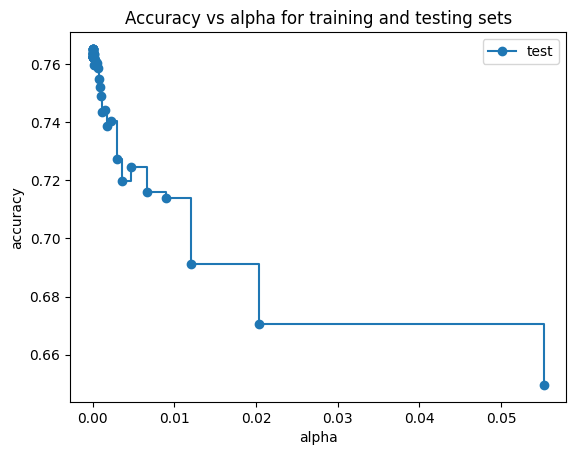

In [137]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
# ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [138]:
from sklearn.model_selection import GridSearchCV
import joblib

In [139]:
param_grid_tree = [{
    'model__ccp_alpha': ccp_alphas,
    'model__max_depth': [1,3,5,7,9,11,12],
    'model__min_samples_split': [2, 3, 4],
    "model__min_samples_leaf":[1,2,3],
    # "model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    # "model__max_features":["auto","log2","sqrt",None],
    # "model__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
    # 'model__splitter': ['best', 'random']
}]



In [140]:
GridSearchCV_tree = GridSearchCV(estimator=pipeline,
                                 param_grid=param_grid_tree, cv=2, verbose=2)


In [141]:


gscv = GridSearchCV_tree.fit(input_x, input_y)


Fitting 2 folds for each of 3213 candidates, totalling 6426 fits
[CV] END model__ccp_alpha=0.0, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__ccp_alpha=0.0, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__ccp_alpha=0.0, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=3; total time=   0.0s
[CV] END model__ccp_alpha=0.0, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=3; total time=   0.0s
[CV] END model__ccp_alpha=0.0, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=4; total time=   0.0s
[CV] END model__ccp_alpha=0.0, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=4; total time=   0.0s
[CV] END model__ccp_alpha=0.0, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=2; total time=   0.0s
[CV] END model__ccp_alpha=0.0, model__max_depth=1, model__mi

In [ ]:
gscv.best_estimator_.get_params()

{'memory': None,
 'steps': [('normalize', MinMaxScaler()),
  ('model', DecisionTreeRegressor(max_depth=3, random_state=20))],
 'verbose': False,
 'normalize': MinMaxScaler(),
 'model': DecisionTreeRegressor(max_depth=3, random_state=20),
 'normalize__clip': False,
 'normalize__copy': True,
 'normalize__feature_range': (0, 1),
 'model__ccp_alpha': 0.0,
 'model__criterion': 'squared_error',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__random_state': 20,
 'model__splitter': 'best'}

In [ ]:
joblib.dump(gscv.best_estimator_, "antenna_model.pkl", compress=1)

['antenna_model.pkl']

In [ ]:
get_score(X_test, y_test, predictions, gscv.best_estimator_)

0.5331439393939394